# Anomalies Detection with Neural Network: Autoencoder




## Theory:

**Anomaly detection**: is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers.

**Clustering-Based Anomaly Detection**: 

Clustering is one of the most popular concepts in the domain of unsupervised learning.

Clustering (or cluster analysis) is a technique that allows us to find groups of similar objects, objects that are more related to each other than to objects in other groups.

Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids.

K-means is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies.

K - number of clusters that we want





### Links:

**Detection**

Fraud Detection Using Autoencoders in Keras with a TensorFlow Backend:
https://www.datascience.com/blog/fraud-detection-with-tensorflow

Neural Networks for Anomaly (Outliers) Detection:
https://blog.goodaudience.com/neural-networks-for-anomaly-outliers-detection-a454e3fdaae8

Credit Card Fraud Detection using Autoencoders in Keras — TensorFlow for Hackers (Part VII):
https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd

understanding activation functions in neural networks:
https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

complete guide of activation functions:
https://towardsdatascience.com/complete-guide-of-activation-functions-34076e95d044

Autoencoders for the compression of stock market time series:
https://towardsdatascience.com/autoencoders-for-the-compression-of-stock-market-data-28e8c1a2da3e

what is artificial neuron:
https://becominghuman.ai/what-is-an-artificial-neuron-8b2e421ce42e

**Prediction**

Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras:
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/


In [8]:
#Step1. Importing the required libraries

import pandas as pd # pandas is a dataframe library
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
import numpy as np # numpy prvides N-dim object support
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
#import seaborn as sns
#import warnings
#warning.filterwarnings("ignore")

#do ploting inline insted of in a separate window
%matplotlib inline



## Step 2. Read data:

In [23]:
#Load and Review data

df = pd.read_csv("/Users/constantine/Applications/Projects/Python/machine-learning/data/test-data.csv") #load Pima data.

df.head(3)
d = df

In [24]:
#check structure of the data

d.shape #(number rows, number columns)

(10, 4)

In [25]:
#Split of categorical and continuous features:

categorical_features = ['file_name']

continuous_features =['file_size','load_timestamp']

In [26]:
#To use the categorical features, 
#we need to convert the categorical features to binary 
#using pandas get dummies.

for col in categorical_features:
    dummies = pd.get_dummies(d[col], prefix=col)
    d = pd.concat([d, dummies], axis=1)
    d.drop(col, axis=1, inplace=True)
d.head()

,file_size,load_timestamp,label,file_name_s3_meta
0,380,20190710092917,0,1
1,358,20190709094145,0,1
2,364,20190708091748,0,1
3,331,20190707096135,0,1
4,329,20190706090134,0,1


In [36]:
df.head(5) #explore data

,file_name,file_size,load_timestamp
0,s3-meta,380,20190710092917
1,s3_meta,358,20190709094145
2,s3_meta,364,20190708091748
3,s3_meta,331,20190707096135
4,s3_meta,329,20190706090134


In [8]:
#Formating Data
#Columns to eliminate: not used, no values, duplicates

df.isnull().values.any() #check for null values

False

In [37]:
def plot_corr(df, size=11):
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) #color code the rectagles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) #draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) #draw y tick marks


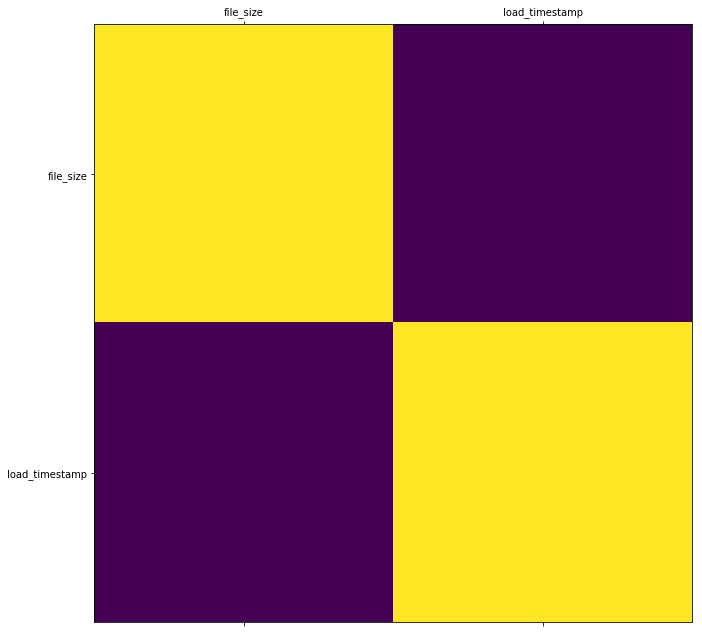

In [38]:
plot_corr(df)

In [39]:
#Check correlation between columns
df.corr() 


,file_size,load_timestamp
file_size,1.000000,0.736095
load_timestamp,0.736095,1.000000


In [44]:
#Split of categorical and continuous features:

categorical_features = ['file_name']

continuous_features =['file_size','load_timestamp']

In [46]:
df[continuous_features].describe()

,file_size,load_timestamp
count,10.000000,1.000000e+01
mean,344.000000,2.019071e+13
std,23.781412,3.028018e+06
min,319.000000,2.019070e+13
25%,323.000000,2.019070e+13
50%,337.000000,2.019071e+13
75%,362.500000,2.019071e+13
max,380.000000,2.019071e+13


In [49]:
#To use the categorical features, 
#we need to convert the categorical features to binary 
#using pandas get dummies.

for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.head()

,file_size,load_timestamp,file_name_s3-meta,file_name_s3_meta
0,380,20190710092917,1,0
1,358,20190709094145,0,1
2,364,20190708091748,0,1
3,331,20190707096135,0,1
4,329,20190706090134,0,1


In [51]:
#To give equal importance to all features, 
#we need to scale the continuous features. 
#We will be using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features . Other alternatives includes StandardScaler.

mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)
print(data_transformed)

[[1.         1.         1.         0.        ]
 [0.63934426 0.88902639 0.         1.        ]
 [0.73770492 0.77765001 0.         1.        ]
 [0.19672131 0.6670274  0.         1.        ]
 [0.16393443 0.55525058 0.         1.        ]
 [0.93442623 0.44454209 0.         1.        ]
 [0.39344262 0.33323293 0.         1.        ]
 [0.03278689 0.2220301  0.         1.        ]
 [0.         0.11114216 0.         1.        ]
 [0.         0.         0.         1.        ]]


In [55]:
#For each k value, we will initialise k-means 
#and use the inertia attribute to identify the sum of squared distances 
#of samples to the nearest cluster centre.

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

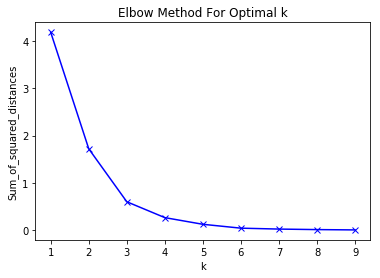

In [53]:
#Below is a plot of sum of squared distances for k in the range specified above.
#If the plot looks like an arm, then the elbow on the arm is optimal k.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

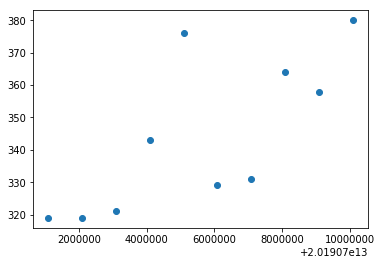

In [66]:
df = pd.read_csv("/Users/constantine/Applications/Projects/Python/machine-learning/data/s3-file-metadata.csv") #load Pima data.

x = df['load_timestamp'].values
y = df['file_size'].values
X = np.array(list(zip(x, y)))
plt.scatter(x,y)

In [67]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [79]:
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
C = kmeans.cluster_centers_

In [80]:
# Comparing with scikit-learn centroids
print(C) # From sci-kit learn

[[2.01907036e+13 3.32000000e+02]
 [2.01907096e+13 3.69000000e+02]
 [2.01907016e+13 3.19000000e+02]
 [2.01907076e+13 3.47500000e+02]
 [2.01907056e+13 3.52500000e+02]]


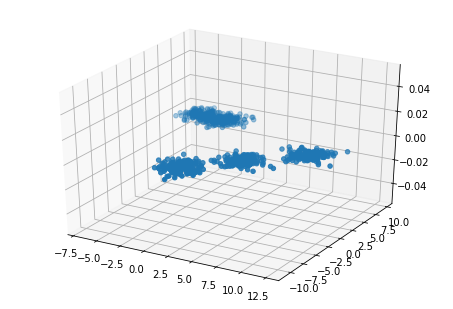

In [94]:
# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=2, centers=5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

IndexError: index 2 is out of bounds for axis 1 with size 2

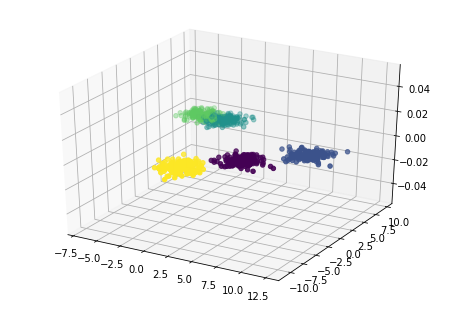

In [102]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], C[:, 3], marker='*', c='#050505', s=1000)

In [ ]:
#Identifying the appropriate number of clusters k



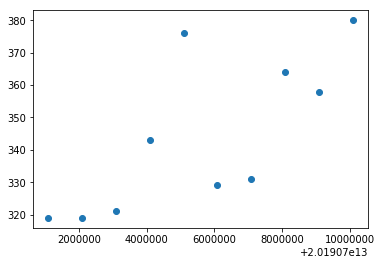

In [42]:
x = df['load_timestamp']
y = df['file_size']
plt.scatter(x,y)

In [23]:
#Modling Data:
#Adjusting data types, creating new columns, if required


#Check Data Types: we need to change True to 1 and False to 0

diabetes_map = {True : 1, False : 0}

df['diabetes'] = df['diabetes'].map(diabetes_map)

In [26]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
#Check true/false ratio

num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

true_calc = (num_true/(num_true + num_false))*100


false_calc = (num_false/(num_false + num_true))*100

print("Number of True cases: {0}({1})".format(num_true,true_calc))
print("Number of False cases: {0}({1})".format(num_false,false_calc))


Number of True cases: 268(34.89583333333333)
Number of False cases: 500(65.10416666666666)


In [31]:
#Splitting the data
#70% for training and 30% for testing

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
             


In [32]:
#We check to ensure we have the the desired 70% train, 30% test split of the data
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))


69.92% in training set
30.08% in test set


In [33]:
#Verifying predicted value was split correctly
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)
